<a href="https://colab.research.google.com/github/Eugent007/ML-notes/blob/main/Detection_of_seagulls/Detection_of_seagulls_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

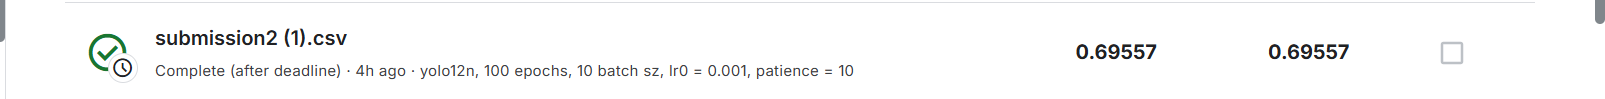

In [ ]:
!pip install ultralytics opendatasets --quiet

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from ultralytics import YOLO
import os
import opendatasets as od
import pandas as pd

url = 'https://www.kaggle.com/competitions/where-are-the-seagulls'
od.download(url)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.2 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultraly

100%|██████████| 36.7M/36.7M [00:00<00:00, 1.32GB/s]


Extracting archive ./where-are-the-seagulls/where-are-the-seagulls.zip to ./where-are-the-seagulls


# Анализ фотографий в тестовой и тренировочных базах

In [ ]:
import cv2

# Путь к тренировочным данным
train_images_path = 'where-are-the-seagulls/data/train/images'
image_files = os.listdir(train_images_path)

# Путь к тестовым данным
test_images_path = 'where-are-the-seagulls/data/test/images'
test_image_files = os.listdir(test_images_path)

# Анализ размеров
heights = []
widths = []
for img_file in image_files:
    img = cv2.imread(os.path.join(train_images_path, img_file))
    h, w = img.shape[:2]
    widths.append(w)
    heights.append(h)

heights2 = []
widths2 = []
for img_file in test_image_files:
    img = cv2.imread(os.path.join(test_images_path, img_file))
    h, w = img.shape[:2]
    widths2.append(w)
    heights2.append(h)

print('Widths of training images:', pd.unique(widths))
print('Heights of training images', pd.unique(heights))

print('-' * 50)

print('Widths of test images:', pd.unique(widths2))
print('Heights of test images', pd.unique(heights2))

Widths of training images: [640]
Heights of training images [640]
--------------------------------------------------
Widths of test images: [640]
Heights of test images [640]


/tmp/ipython-input-2-2902559444.py:28: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  print('Widths of training images:', pd.unique(widths))
/tmp/ipython-input-2-2902559444.py:29: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  print('Heights of training images', pd.unique(heights))
/tmp/ipython-input-2-2902559444.py:33: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  print('Widths of test images:', pd.unique(widths2))
/tmp/ipython-input-2-2902559444.py:34: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  print('Heights of test images', pd.unique(heights2))


Получается что все фотографии в тренировочных и тестовых данных строго 640*640


# Анализ тестовых labels


Среднее количество объектов на изображение: 10.77
Максимальное количество объектов: 39
Минимальное количество объектов: 0


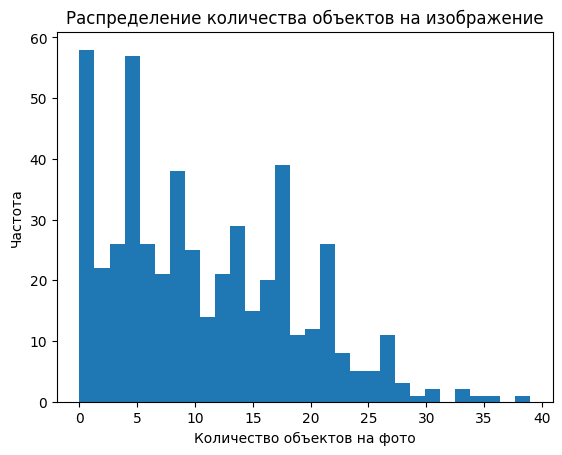

In [ ]:
label_files = os.listdir('where-are-the-seagulls/data/train/labels')

obj_counts = []
for lbl_file in label_files:
    with open(os.path.join('where-are-the-seagulls/data/train/labels', lbl_file)) as f:
        lines = f.readlines()
        obj_counts.append(len(lines))

print(f"Среднее количество объектов на изображение: {sum(obj_counts)/len(obj_counts):.2f}")
print(f"Максимальное количество объектов: {max(obj_counts)}")
print(f"Минимальное количество объектов: {min(obj_counts)}")

# Визуализация
plt.hist(obj_counts, bins=30)
plt.title('Распределение количества объектов на изображение')
plt.xlabel('Количество объектов на фото')
plt.ylabel('Частота')
plt.show()

# Готовим данные для работы с моделью YOLO

In [ ]:
# Создаем структуру папок для использования в YOLO
os.makedirs('where-are-the-seagulls/for_yolo/images/train', exist_ok=True)
os.makedirs('where-are-the-seagulls/for_yolo/images/val', exist_ok=True)
os.makedirs('where-are-the-seagulls/for_yolo/images/test', exist_ok=True)
os.makedirs('where-are-the-seagulls/for_yolo/labels/train', exist_ok=True)
os.makedirs('where-are-the-seagulls/for_yolo/labels/val', exist_ok=True)

In [ ]:
from sklearn.model_selection import train_test_split
import shutil

In [ ]:
# Получаем список всех изображений
image_files = os.listdir('where-are-the-seagulls/data/train/images')

# Разделяем на train и val (80%/20%)
train_images_files, val_images_files = train_test_split(image_files, test_size=0.2, random_state=49)

# Копируем файлы в соответствующие папки
def copy_files(files, image_source_path, label_source_path, image_dest_path, label_dest_path):
    for f in files:
        # Копируем изображение
        shutil.copy(os.path.join(image_source_path, f), image_dest_path)
        # Копируем аннотацию
        label_file = f.replace('.jpg', '.txt')
        shutil.copy(os.path.join(label_source_path, label_file), label_dest_path)

# Копируем тренировочные данные
copy_files(train_images_files, 'where-are-the-seagulls/data/train/images', 'where-are-the-seagulls/data/train/labels',
          'where-are-the-seagulls/for_yolo/images/train', 'where-are-the-seagulls/for_yolo/labels/train')

# Копируем валидационные данные
copy_files(val_images_files, 'where-are-the-seagulls/data/train/images', 'where-are-the-seagulls/data/train/labels',
          'where-are-the-seagulls/for_yolo/images/val', 'where-are-the-seagulls/for_yolo/labels/val')

# Копируем тестовые данные
for f in os.listdir('where-are-the-seagulls/data/test/images'):
    shutil.copy(os.path.join('where-are-the-seagulls/data/test/images', f), 'where-are-the-seagulls/for_yolo/images/test')

In [ ]:
print('Кол-во фото в исходной тренировочной базе:', len(os.listdir('where-are-the-seagulls/data/train/images')))
print('Кол-во описаний в исходной тренировочной базе:', len(os.listdir('where-are-the-seagulls/data/train/labels')))
print('Кол-во фото в исходной тестовой базе:', len(os.listdir('where-are-the-seagulls/data/test/images')))

print('-' * 50)

print('Кол-во фото в тренировочной базе после разделения и перемещения:', len(os.listdir('where-are-the-seagulls/for_yolo/images/train')))
print('Кол-во фото в базе для валидирования после разделения и перемещения:', len(os.listdir('where-are-the-seagulls/for_yolo/images/val')))
print('Кол-во фото в тестовой базе после разделения и перемещения:', len(os.listdir('where-are-the-seagulls/for_yolo/images/test')))
print('Кол-во описаний в тренировочной базе после разделения и перемещения:', len(os.listdir('where-are-the-seagulls/for_yolo/labels/train')))
print('Кол-во описаний в базе для валидирования после разделения и перемещения:', len(os.listdir('where-are-the-seagulls/for_yolo/labels/val')))

Кол-во фото в исходной тренировочной базе: 500
Кол-во описаний в исходной тренировочной базе: 500
Кол-во фото в исходной тестовой базе: 99
--------------------------------------------------
Кол-во фото в тренировочной базе после разделения и перемещения: 400
Кол-во фото в базе для валидирования после разделения и перемещения: 100
Кол-во фото в тестовой базе после разделения и перемещения: 99
Кол-во описаний в тренировочной базе после разделения и перемещения: 400
Кол-во описаний в базе для валидирования после разделения и перемещения: 100


In [ ]:
import yaml

In [ ]:
# Создаем dataset.yaml для использования в обучении модели YOLO
data = {
    'path': 'where-are-the-seagulls/for_yolo',
    'train': 'images/train',
    'val': 'images/val',
    'test': 'images/test',
    'names': {0: 'seagull'}
}

with open('dataset.yaml', 'w') as f:
    yaml.dump(data, f)

# Тренируем модель YOLO

In [ ]:
# Загружаем предобученную модель
model = YOLO('yolo12n.pt')  # Можно использовать yolov8s.pt, yolov8m.pt для большей точности

# Обучаем модель
results = model.train(
    data='dataset.yaml',
    epochs=100,
    batch=10,
    imgsz=640,
    patience=10,  # Ранняя остановка если нет улучшений 10 эпох
    name='seagull_detection',
    lr0=0.001
)

100%|██████████| 5.34M/5.34M [00:00<00:00, 75.6MB/s]


Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=10, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=seagull_detection, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pretrained=Tr

100%|██████████| 755k/755k [00:00<00:00, 21.6MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  2    180864  ultralytics.nn.modules.block.A2C2f           [128, 128, 2, True, 4]        
  7                  -1  1    295424  ultralytics

  8                  -1  2    689408  ultralytics.nn.modules.block.A2C2f           [256, 256, 2, True, 1]        
  9                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 10             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 11                  -1  1     86912  ultralytics.nn.modules.block.A2C2f           [384, 128, 1, False, -1]      
 12                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 13             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 14                  -1  1     24000  ultralytics.nn.modules.block.A2C2f           [256, 64, 1, False, -1]       
 15                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
 16            [-1, 11]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 103MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1884.8±824.1 MB/s, size: 84.4 KB)


train: Scanning /content/where-are-the-seagulls/for_yolo/labels/train... 400 images, 26 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<00:00, 2538.76it/s]

train: /content/where-are-the-seagulls/for_yolo/images/train/20200816_180222_01_JPG.rf.5f3bc87ff01f17b2a00c3ecf18d14ac5.jpg: 2 duplicate labels removed
train: /content/where-are-the-seagulls/for_yolo/images/train/20200819_182328_01_JPG.rf.cca24be539aa73a24a2bf112ab67fe68.jpg: 3 duplicate labels removed
train: /content/where-are-the-seagulls/for_yolo/images/train/20200910_185837_01_JPG.rf.cdf85cd8e98797d94fb93d972d58fc5f.jpg: 1 duplicate labels removed
train: /content/where-are-the-seagulls/for_yolo/images/train/20200913_121758_01_JPG.rf.126b4bd798cd834f2c08f1c85a6fee70.jpg: 1 duplicate labels removed
train: New cache created: /content/where-are-the-seagulls/for_yolo/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 655.0±373.1 MB/s, size: 55.3 KB)


val: Scanning /content/where-are-the-seagulls/for_yolo/labels/val... 100 images, 6 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 1712.28it/s]

val: /content/where-are-the-seagulls/for_yolo/images/val/20200913_171925_01_JPG.rf.de1d151832416a3f2df30dcdbf84bf8a.jpg: 3 duplicate labels removed
val: /content/where-are-the-seagulls/for_yolo/images/val/20200924_183741_01_JPG.rf.cbc768e717616cc48643dba4f3a76bbd.jpg: 3 duplicate labels removed
val: New cache created: /content/where-are-the-seagulls/for_yolo/labels/val.cache


Plotting labels to runs/detect/seagull_detection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.00046875), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/seagull_detection
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.21G      2.302      2.465      1.128        140        640: 100%|██████████| 40/40 [00:11<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]


                   all        100       1105    0.00497      0.135    0.00286   0.000932

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.33G      2.257      1.647       1.13        179        640: 100%|██████████| 40/40 [00:10<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.28it/s]

                   all        100       1105    0.00247      0.067     0.0063    0.00388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.34G      2.274      1.643      1.149        111        640: 100%|██████████| 40/40 [00:09<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.01it/s]


                   all        100       1105      0.283      0.329      0.208     0.0609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.36G      2.166      1.473      1.116        211        640: 100%|██████████| 40/40 [00:09<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.26it/s]

                   all        100       1105      0.505      0.506      0.443      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.37G      2.179      1.425      1.113        113        640: 100%|██████████| 40/40 [00:09<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.58it/s]

                   all        100       1105      0.626        0.6      0.592      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.39G      2.154      1.375      1.114        128        640: 100%|██████████| 40/40 [00:08<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.61it/s]

                   all        100       1105      0.461      0.464      0.417      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       2.4G      2.138      1.331      1.103        223        640: 100%|██████████| 40/40 [00:08<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.32it/s]

                   all        100       1105      0.765      0.677      0.728      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.42G      2.052      1.282      1.102        141        640: 100%|██████████| 40/40 [00:09<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.32it/s]


                   all        100       1105      0.752      0.682      0.751      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.43G      2.071      1.286      1.093        162        640: 100%|██████████| 40/40 [00:09<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.42it/s]

                   all        100       1105      0.735      0.655      0.695      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.45G      2.038      1.243      1.096        117        640: 100%|██████████| 40/40 [00:09<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.52it/s]

                   all        100       1105      0.734      0.646      0.705      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.46G      2.088      1.228      1.096        103        640: 100%|██████████| 40/40 [00:09<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.16it/s]


                   all        100       1105      0.415      0.419      0.294     0.0849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.47G      2.025      1.184      1.083        198        640: 100%|██████████| 40/40 [00:08<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.64it/s]

                   all        100       1105       0.65       0.54      0.561      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.49G      2.048      1.211      1.094        136        640: 100%|██████████| 40/40 [00:08<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.65it/s]

                   all        100       1105       0.77      0.652      0.742      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       2.5G      2.056      1.204      1.086        133        640: 100%|██████████| 40/40 [00:09<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.45it/s]


                   all        100       1105      0.814       0.72      0.795      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.52G      2.008      1.167      1.083        149        640: 100%|██████████| 40/40 [00:09<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.57it/s]

                   all        100       1105      0.811      0.684      0.779      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.54G      1.996      1.144      1.081         84        640: 100%|██████████| 40/40 [00:09<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.68it/s]

                   all        100       1105      0.804      0.691      0.778      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.55G      2.022      1.149      1.065        252        640: 100%|██████████| 40/40 [00:08<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.01it/s]

                   all        100       1105      0.786      0.706      0.771      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.67G      2.005      1.148      1.081        101        640: 100%|██████████| 40/40 [00:08<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.49it/s]

                   all        100       1105      0.815      0.684      0.779      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.69G      1.988      1.119      1.071        151        640: 100%|██████████| 40/40 [00:09<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.69it/s]

                   all        100       1105      0.802      0.703      0.783      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       2.7G      1.971      1.106      1.072        123        640: 100%|██████████| 40/40 [00:09<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.50it/s]

                   all        100       1105      0.812      0.716      0.784      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.72G      1.985      1.102      1.084        113        640: 100%|██████████| 40/40 [00:09<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.45it/s]

                   all        100       1105      0.822      0.691      0.791      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.73G      1.937      1.096      1.065        108        640: 100%|██████████| 40/40 [00:09<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.64it/s]

                   all        100       1105      0.814      0.685       0.78       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.75G      1.997      1.104      1.072         55        640: 100%|██████████| 40/40 [00:08<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.95it/s]

                   all        100       1105      0.803      0.684      0.789      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.76G      1.974      1.077      1.069        114        640: 100%|██████████| 40/40 [00:08<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.60it/s]

                   all        100       1105      0.821      0.685       0.79      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.78G      1.933      1.054      1.053         82        640: 100%|██████████| 40/40 [00:09<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.69it/s]

                   all        100       1105      0.824      0.694      0.767      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.79G      1.909      1.046      1.048        163        640: 100%|██████████| 40/40 [00:09<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.58it/s]

                   all        100       1105      0.798      0.716      0.796      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       2.8G      1.948      1.099      1.068        104        640: 100%|██████████| 40/40 [00:10<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.69it/s]

                   all        100       1105      0.771      0.725      0.768       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.82G      1.943      1.047      1.054        202        640: 100%|██████████| 40/40 [00:08<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.76it/s]

                   all        100       1105      0.825      0.723      0.794       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.83G      1.939      1.034      1.034        261        640: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.70it/s]

                   all        100       1105      0.802      0.747      0.816      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.85G       1.91      1.045       1.05        139        640: 100%|██████████| 40/40 [00:09<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.14it/s]

                   all        100       1105      0.781       0.69      0.794      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.86G      1.907      1.033      1.051        214        640: 100%|██████████| 40/40 [00:09<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.64it/s]

                   all        100       1105      0.853      0.727      0.817      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.88G      1.926      1.046      1.048        142        640: 100%|██████████| 40/40 [00:09<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.50it/s]

                   all        100       1105      0.843      0.718      0.816      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.89G      1.937      1.029      1.061        147        640: 100%|██████████| 40/40 [00:09<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.58it/s]

                   all        100       1105      0.834      0.727      0.809      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.91G      1.893      1.035      1.047        207        640: 100%|██████████| 40/40 [00:08<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]

                   all        100       1105      0.839      0.695      0.812      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.92G      1.933      1.031      1.046        224        640: 100%|██████████| 40/40 [00:08<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.59it/s]

                   all        100       1105      0.794      0.745      0.813      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.94G      1.881      1.009      1.046        179        640: 100%|██████████| 40/40 [00:09<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.61it/s]

                   all        100       1105      0.841      0.718      0.817      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.95G      1.867     0.9836      1.045        133        640: 100%|██████████| 40/40 [00:09<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.47it/s]

                   all        100       1105      0.822      0.727      0.815      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.97G      1.872      1.026      1.026         70        640: 100%|██████████| 40/40 [00:09<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.58it/s]

                   all        100       1105      0.842      0.729      0.829      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.98G      1.901      1.031      1.058         96        640: 100%|██████████| 40/40 [00:08<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.47it/s]

                   all        100       1105      0.825      0.733      0.811      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         3G      1.894      1.007      1.042        164        640: 100%|██████████| 40/40 [00:08<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.50it/s]

                   all        100       1105      0.844      0.741      0.827      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.01G      1.891      1.021      1.047        219        640: 100%|██████████| 40/40 [00:09<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.54it/s]

                   all        100       1105      0.824      0.738      0.824       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.03G      1.844     0.9756      1.046        170        640: 100%|██████████| 40/40 [00:09<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.53it/s]

                   all        100       1105      0.831      0.753      0.842      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.04G      1.849     0.9799      1.028        147        640: 100%|██████████| 40/40 [00:09<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.58it/s]

                   all        100       1105       0.84      0.743      0.834      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.06G      1.858      0.976      1.036        124        640: 100%|██████████| 40/40 [00:09<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.49it/s]

                   all        100       1105      0.817      0.748      0.827      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.07G       1.86     0.9752      1.026        194        640: 100%|██████████| 40/40 [00:08<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.03it/s]

                   all        100       1105      0.815      0.772      0.837      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.09G      1.903      1.017       1.04        192        640: 100%|██████████| 40/40 [00:08<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.55it/s]

                   all        100       1105      0.836      0.745      0.829      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       3.1G       1.89     0.9949      1.028        114        640: 100%|██████████| 40/40 [00:09<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.47it/s]

                   all        100       1105      0.848      0.743      0.833      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.12G      1.836     0.9788      1.028        166        640: 100%|██████████| 40/40 [00:09<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.62it/s]

                   all        100       1105      0.831      0.722      0.827      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.13G      1.832     0.9483      1.021        158        640: 100%|██████████| 40/40 [00:09<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.64it/s]

                   all        100       1105       0.87      0.744      0.841      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.14G      1.828     0.9559      1.033        131        640: 100%|██████████| 40/40 [00:09<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

                   all        100       1105       0.86      0.714      0.813      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.16G      1.848     0.9626      1.034         82        640: 100%|██████████| 40/40 [00:08<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.15it/s]

                   all        100       1105      0.839      0.751      0.832      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.18G      1.819      0.938      1.009        137        640: 100%|██████████| 40/40 [00:10<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.68it/s]

                   all        100       1105      0.842      0.773      0.843      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.19G      1.841     0.9848      1.036         99        640: 100%|██████████| 40/40 [00:09<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.61it/s]

                   all        100       1105      0.846      0.724      0.822       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.21G      1.841     0.9526      1.018        225        640: 100%|██████████| 40/40 [00:09<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.58it/s]

                   all        100       1105      0.874       0.75      0.842      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.22G      1.811     0.9303      1.018        100        640: 100%|██████████| 40/40 [00:09<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.71it/s]

                   all        100       1105      0.842       0.76      0.842      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.23G      1.823     0.9364      1.038        158        640: 100%|██████████| 40/40 [00:09<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.41it/s]

                   all        100       1105      0.852       0.77      0.855      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.25G      1.813     0.9468      1.019        142        640: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.76it/s]

                   all        100       1105      0.862      0.749      0.843      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.26G      1.817     0.9334      1.024        237        640: 100%|██████████| 40/40 [00:09<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.60it/s]

                   all        100       1105       0.88       0.75      0.848      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.28G       1.83     0.9414      1.018        170        640: 100%|██████████| 40/40 [00:09<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.55it/s]

                   all        100       1105       0.86      0.752      0.836      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.29G      1.805     0.9287      1.022        137        640: 100%|██████████| 40/40 [00:09<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.46it/s]

                   all        100       1105      0.846      0.759      0.839      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.31G      1.805     0.9154      1.016        156        640: 100%|██████████| 40/40 [00:09<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.65it/s]

                   all        100       1105      0.847      0.779      0.854      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.32G        1.8     0.9131      1.024        144        640: 100%|██████████| 40/40 [00:08<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.78it/s]

                   all        100       1105      0.852      0.763      0.854      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.34G      1.784     0.9199      1.011        112        640: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.73it/s]

                   all        100       1105      0.873      0.754      0.846      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.35G       1.82     0.9213      1.023        163        640: 100%|██████████| 40/40 [00:09<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.54it/s]

                   all        100       1105      0.879      0.759      0.848      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.37G      1.821     0.9152      1.019        136        640: 100%|██████████| 40/40 [00:09<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.66it/s]

                   all        100       1105      0.896      0.733      0.843       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.38G      1.792     0.9043      1.022        159        640: 100%|██████████| 40/40 [00:09<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.64it/s]

                   all        100       1105      0.859      0.741      0.835      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       3.4G       1.76     0.8946      1.009        139        640: 100%|██████████| 40/40 [00:09<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.61it/s]

                   all        100       1105      0.849      0.759      0.841      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.41G      1.792     0.9002       1.02        128        640: 100%|██████████| 40/40 [00:08<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.01it/s]

                   all        100       1105      0.874      0.749      0.847      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.43G      1.763     0.8977      1.018        126        640: 100%|██████████| 40/40 [00:08<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.72it/s]

                   all        100       1105      0.857      0.746      0.836      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.55G      1.761     0.8934      1.012        143        640: 100%|██████████| 40/40 [00:09<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.41it/s]

                   all        100       1105      0.849      0.759      0.842      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.56G      1.793     0.9005       1.01        106        640: 100%|██████████| 40/40 [00:09<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.68it/s]

                   all        100       1105      0.864      0.749      0.853      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.58G      1.749     0.8909     0.9987        194        640: 100%|██████████| 40/40 [00:09<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.53it/s]

                   all        100       1105      0.846      0.767      0.845       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       3.6G      1.758     0.8943      1.004        109        640: 100%|██████████| 40/40 [00:08<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.09it/s]


                   all        100       1105      0.857       0.75      0.837      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.61G       1.79     0.9139      1.017        116        640: 100%|██████████| 40/40 [00:08<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.59it/s]

                   all        100       1105       0.84      0.762      0.841      0.391


EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 64, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

74 epochs completed in 0.218 hours.
Optimizer stripped from runs/detect/seagull_detection/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/seagull_detection/weights/best.pt, 5.5MB

Validating runs/detect/seagull_detection/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,556,923 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]


                   all        100       1105       0.88      0.757      0.847      0.396
Speed: 0.7ms preprocess, 10.8ms inference, 0.0ms loss, 8.3ms postprocess per image
Results saved to runs/detect/seagull_detection


# Как прошло обучение

In [ ]:
# Загружаем лучшую обученную модель
model = YOLO('runs/detect/seagull_detection/weights/best.pt')

# Оцениваем на валидационном наборе
metrics = model.val()
print(f"mAP50-95: {metrics.box.map:.4f}")
print(f"mAP50: {metrics.box.map50:.4f}")

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,556,923 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1462.3±489.7 MB/s, size: 60.8 KB)


val: Scanning /content/where-are-the-seagulls/for_yolo/labels/val.cache... 100 images, 6 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

val: /content/where-are-the-seagulls/for_yolo/images/val/20200913_171925_01_JPG.rf.de1d151832416a3f2df30dcdbf84bf8a.jpg: 3 duplicate labels removed
val: /content/where-are-the-seagulls/for_yolo/images/val/20200924_183741_01_JPG.rf.cbc768e717616cc48643dba4f3a76bbd.jpg: 3 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]


                   all        100       1105      0.882      0.757      0.848      0.396
Speed: 4.8ms preprocess, 15.7ms inference, 0.0ms loss, 7.2ms postprocess per image
Results saved to runs/detect/val
mAP50-95: 0.3958
mAP50: 0.8480


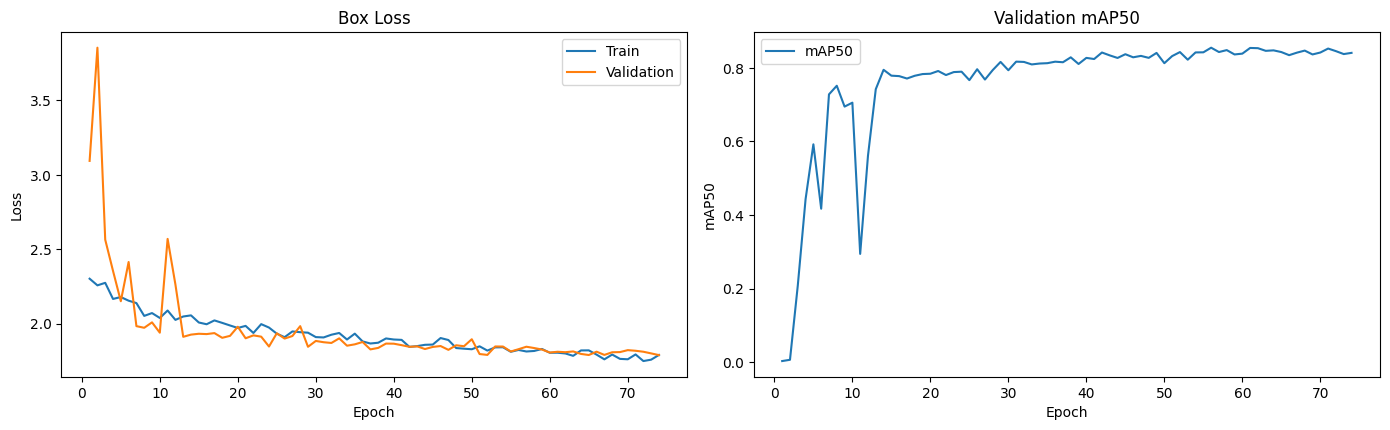

In [ ]:
from matplotlib.ticker import MaxNLocator

def plot_loss_curves(results_path='runs/detect/seagull_detection/results.csv'):
    # Загрузка данных о потерях
    df = pd.read_csv(results_path)

    # Подготовка фигуры
    plt.figure(figsize=(14, 8))

    # График для потерь боксов (box loss)
    plt.subplot(2, 2, 1)
    plt.plot(df['epoch'], df['train/box_loss'], label='Train')
    plt.plot(df['epoch'], df['val/box_loss'], label='Validation')
    plt.title('Box Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    # График для метрики mAP50
    plt.subplot(2, 2, 2)
    plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP50')
    plt.title('Validation mAP50')
    plt.ylabel('mAP50')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.savefig('loss_curves.png', dpi=300, bbox_inches='tight')
    plt.show()

# Вызов функции
plot_loss_curves()

In [ ]:
'''
# Предсказание на тестовых данных
test_results = model('where-are-the-seagulls/for_yolo/images/test')

# Сохранение результатов
os.makedirs('predictions', exist_ok=True)
for i, r in enumerate(test_results):
    im_array = r.plot()  # Рисуем bounding boxes
    cv2.imwrite(f'predictions/test_{i}.jpg', im_array[..., ::-1])  # Сохраняем изображения с предсказаниями

# Примеры работы на тестовых данных
i = 0
for result in test_results:
  result.show()
  i += 1
  if i == 10:
    break
'''

"\n# Предсказание на тестовых данных\ntest_results = model('where-are-the-seagulls/for_yolo/images/test')\n\n# Сохранение результатов\nos.makedirs('predictions', exist_ok=True)\nfor i, r in enumerate(test_results):\n    im_array = r.plot()  # Рисуем bounding boxes\n    cv2.imwrite(f'predictions/test_{i}.jpg', im_array[..., ::-1])  # Сохраняем изображения с предсказаниями\n\n# Примеры работы на тестовых данных\ni = 0\nfor result in test_results:\n  result.show()\n  i += 1\n  if i == 10:\n    break\n"

# Проверяем на тестовой базе


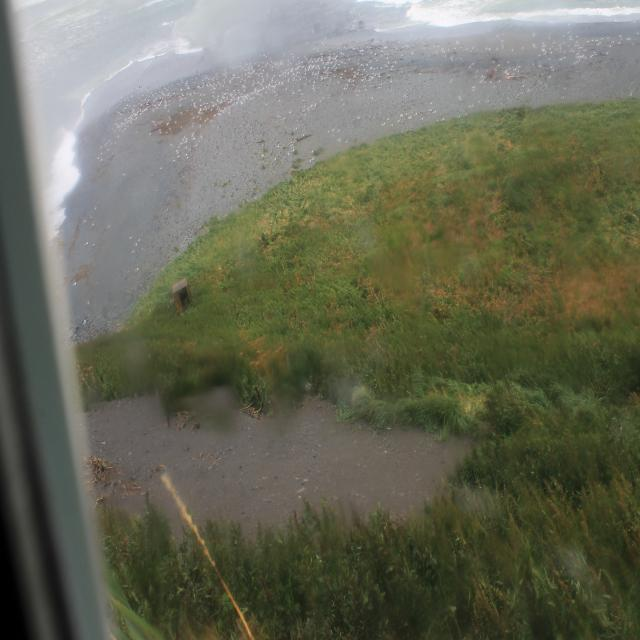

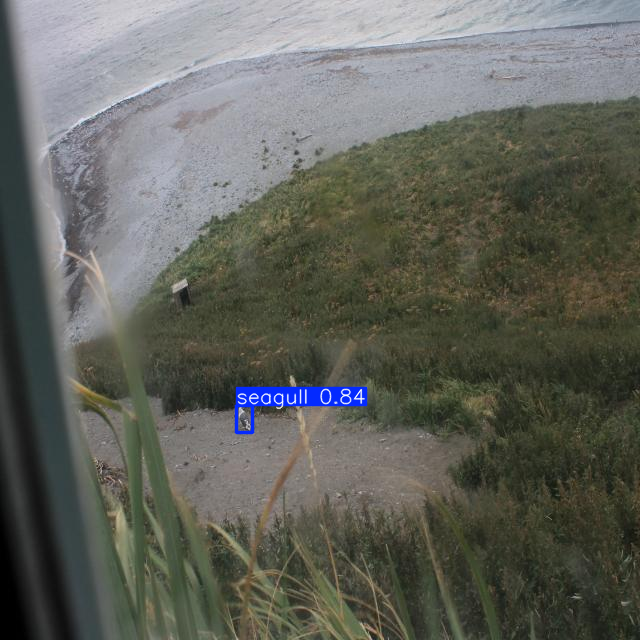

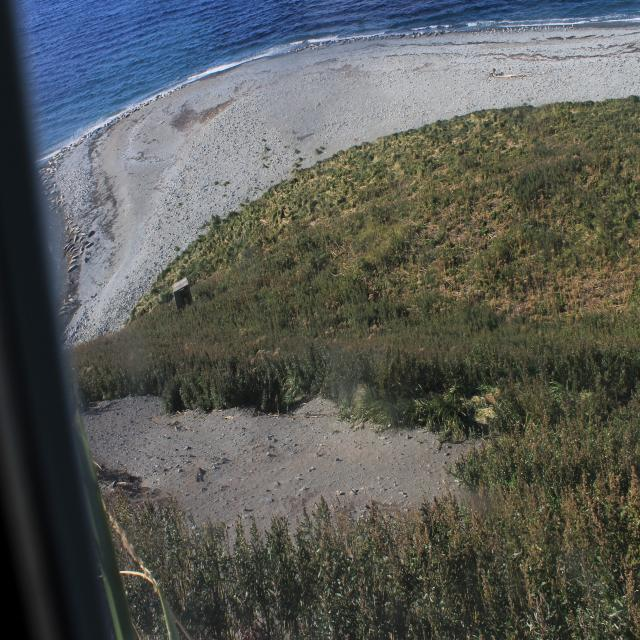

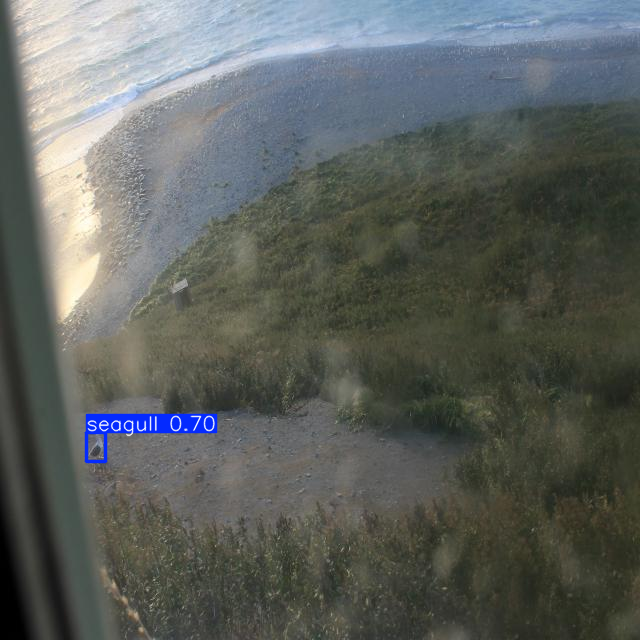

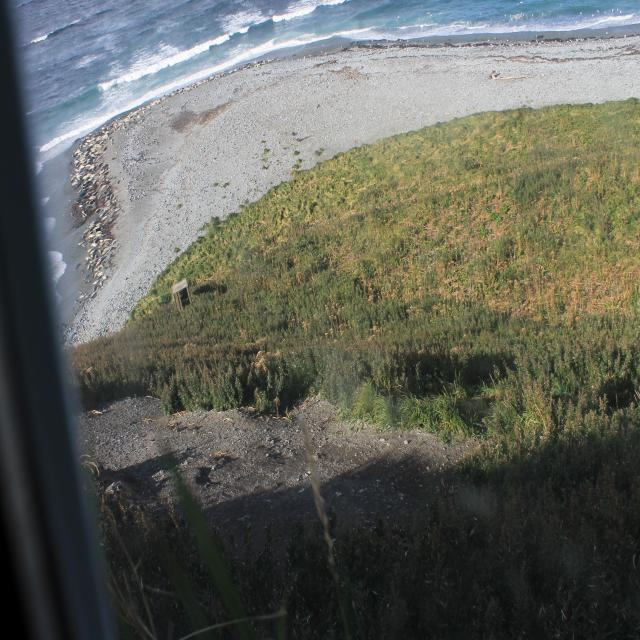

Файл submission.csv успешно сохранен!
   index                                           filename  \
0      0  20200929_091035_01_JPG.rf.cc0f7b275eb3a5dd680d...   
1      1  20201004_174838_01_JPG.rf.c9ee98a1f87fb033ff7b...   
2      2  20201011_143747_01_JPG.rf.1a8844176e2f98a7e391...   
3      3  20201007_181009_01_JPG.rf.4e91affc74f3156f0f4d...   
4      4  20201008_121538_01_JPG.rf.26e4e9692f1520f56a84...   

                                     bbox  
0                                      -1  
1  0 0.381769 0.654563 0.024859 0.043300   
2                                      -1  
3  0 0.150365 0.699171 0.029557 0.045272   
4                                      -1  


In [ ]:
# Путь к тестовым изображениям
test_images_path = 'where-are-the-seagulls/for_yolo/images/test'
test_images = os.listdir(test_images_path)

# Список для хранения результатов
results = []
obj_counts = []

for index, filename in enumerate(test_images):
    # Полный путь к изображению
    img_path = os.path.join(test_images_path, filename)

    # Получение предсказаний
    preds = model.predict(img_path, verbose=False)

    # Покажем что нашли на первых 5 фотографиях
    if index < 5:
      preds[0].show()

    # Форматирование bounding boxes
    bbox_entries = ""
    for box in preds[0].boxes:
        # Координаты в формате YOLO (нормализованные x_center, y_center, width, height)
        x_center, y_center, width, height = box.xywhn[0].tolist()
        class_id = int(box.cls)
        conf = float(box.conf)

        # Формат: 0 x_center y_center width height
        bbox_entry = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f} "
        bbox_entries += bbox_entry

    # Если ничего не обнаружили выводим -1
    if bbox_entries == "":
      bbox_entries = "-1"

    # Добавляем в результаты
    results.append({
        'index': index,
        'filename': filename,
        'bbox': bbox_entries
    })

    # Для анализа
    obj_counts.append(len(preds[0].boxes))

# Создаем DataFrame
df = pd.DataFrame(results)

# Убедимся, что колонки в правильном порядке
df = df[['index', 'filename', 'bbox']]

# Сохраняем в CSV без кавычек
df.to_csv('submission2.csv', index=False, quoting=3)
print("Файл submission.csv успешно сохранен!")

# Проверка содержимого файла
print(pd.read_csv('submission2.csv').head())

# Анализ на тестовой базе

Среднее количество объектов на изображение: 1.20
Максимальное количество объектов: 9
Минимальное количество объектов: 0


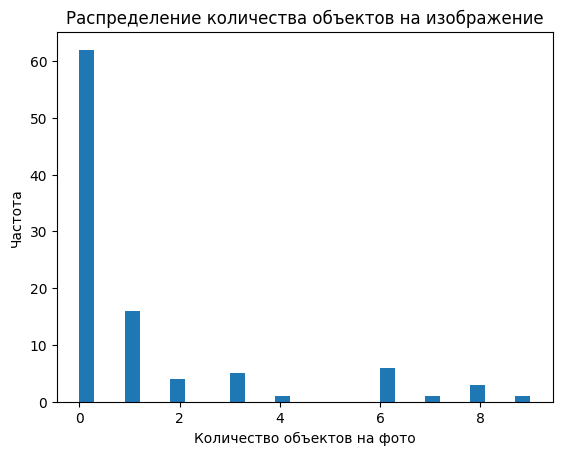

In [ ]:
print(f"Среднее количество объектов на изображение: {sum(obj_counts)/len(obj_counts):.2f}")
print(f"Максимальное количество объектов: {max(obj_counts)}")
print(f"Минимальное количество объектов: {min(obj_counts)}")

# Визуализация
plt.hist(obj_counts, bins=30)
plt.title('Распределение количества объектов на изображение')
plt.xlabel('Количество объектов на фото')
plt.ylabel('Частота')
plt.show()